___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")

In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Birgül\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Birgül\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Birgül\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Birgül\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col = 0)


In [21]:
df.shape

(23486, 10)

In [15]:
df = df.copy()
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

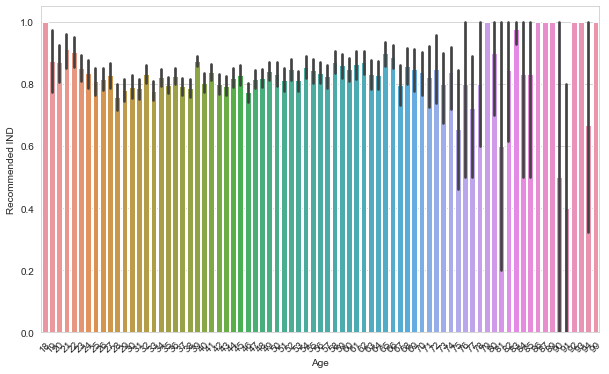

In [16]:
sns.barplot(data = df, x = "Age", y = "Recommended IND")
plt.xticks(rotation = 45);

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [17]:
df["Recommended IND"].value_counts(dropna = False)

1    19314
0     4172
Name: Recommended IND, dtype: int64

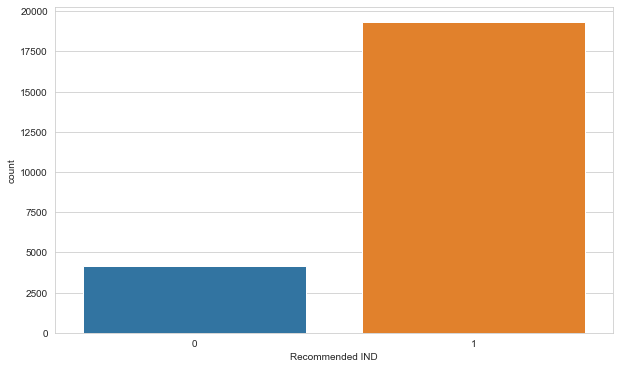

In [18]:
sns.countplot(data = df, x = "Recommended IND");

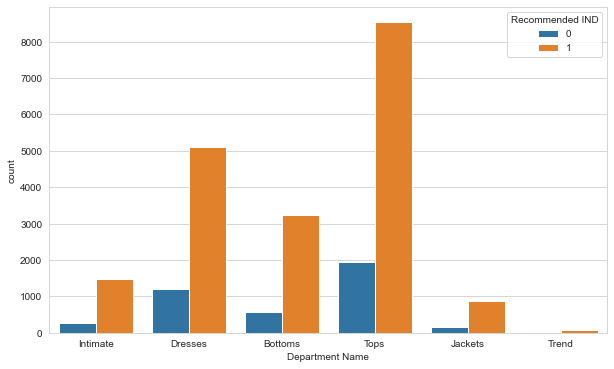

In [19]:
sns.countplot(data=df, x = "Department Name", hue = "Recommended IND");

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [22]:
df1 = df[["Review Text", "Recommended IND"]]
df1.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 550.5+ KB


---
---


### Missing Value Detection

In [24]:
df1.isna().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [25]:
df1 = df1.dropna(subset=['Review Text'], axis=0)
df1 = df1.reset_index(drop=True)

In [26]:
df1.isna().sum()

Review Text        0
Recommended IND    0
dtype: int64

In [27]:
df1.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [28]:
df1["Review Text"].str.isspace().sum()
df1[df1["Review Text"].str.isspace() == True].index

Int64Index([], dtype='int64')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [29]:
df1['Review Text'] = df1['Review Text'].str.lower()
df1['Review Text'].head()

0    absolutely wonderful - silky and sexy and comf...
1    love this dress!  it's sooo pretty.  i happene...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [30]:
stop_words = stopwords.words("english")

In [31]:
def cleaning(data):
    
  
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
     # ayraçları kaldırıyorum ki (can't gibi) olumsuzluk içeren kelimeler içinde ayraç içerdiği için stopwords lerde silinmesin.
        
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  # noktalama işaretlerinden temizlemek icin
    
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # stopword lerden temizleme
   
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [32]:
df1["Review Text"] = df1["Review Text"].apply(cleaning)
df1["Review Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review Text, dtype: object

In [33]:
" ".join(df1["Review Text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [34]:
rare_words = pd.Series(" ".join(df1["Review Text"]).split()).value_counts()
rare_words

dress        11352
fit          10128
size          9363
love          8992
top           8280
             ...  
particle         1
deposited        1
sof              1
easel            1
platinum         1
Length: 11996, dtype: int64

In [35]:
rare_words = rare_words[rare_words <= 2] 

In [36]:
rare_words.index

Index(['greater', 'trashed', 'film', 'looove', 'damask', 'status', 'squarish',
       'allusion', 'gorge', 'doe',
       ...
       'mosly', 'retailerday', 'encouraging', 'hahahaha', 'gasped', 'particle',
       'deposited', 'sof', 'easel', 'platinum'],
      dtype='object', length=6497)

In [37]:
df1["Review Text"] = df1["Review Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df1["Review Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review Text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [38]:
df1.sample(5)

,Review Text,Recommended IND
8105,dress amazing beautiful perfect fall color bea...,1
14087,fabric design short great dont adore fit littl...,1
6342,agree review dress flare lot resemble tent siz...,1
19584,purchased dress store realized could get petit...,1
2658,love top purchased shirt local retailer store ...,1


In [39]:
pos = df1[df1["Recommended IND"]==1]
pos.head()

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,basket hte last see would look like person sto...,1


In [40]:
neg = df1[df1["Recommended IND"]==0]
neg.head()

,Review Text,Recommended IND
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0
22,first pullover styling side zipper wouldnt pur...,0
25,loved material didnt really look long dress pu...,0


In [41]:
len(pos),len(neg)

(18540, 4101)

### Collect Words (positive and negative separately)

In [42]:
all_words_pos = " ".join(pos["Review Text"]) 

In [43]:
all_words_neg = " ".join(neg["Review Text"]) 

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [44]:
from wordcloud import WordCloud

In [45]:
wordcloud = WordCloud(background_color="white", max_words =250)   
wordcloud.generate(all_words_pos)

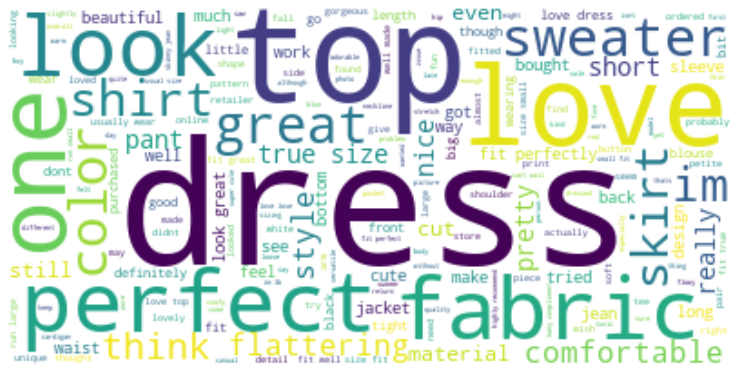

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

In [47]:
wordcloud = WordCloud(background_color="white", max_words =250)  # The maximum number of words. 
wordcloud.generate(all_words_neg)

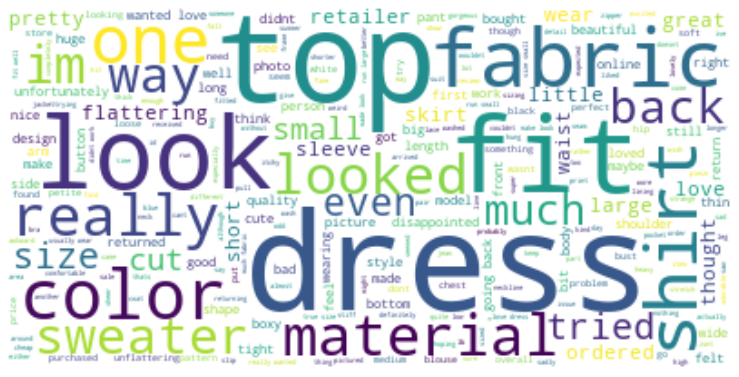

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df1["Review Text"]
y= df1["Recommended IND"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)  
X_test_count = vectorizer.transform(X_test)

### TF-IDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [56]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score

In [57]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

## Logistic Regression

### CountVectorizer

In [58]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = .1, max_iter=1000, penalty = "l2", class_weight= "balanced")
log.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.85      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.85     18112
weighted avg       0.92      0.89      0.90     18112



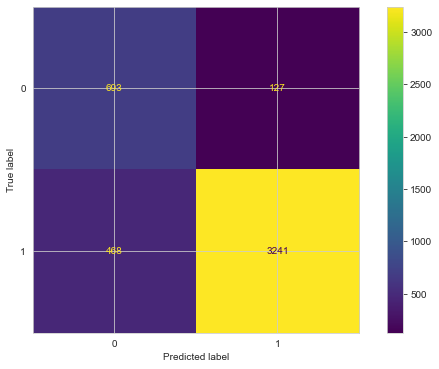

In [59]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

In [60]:
from yellowbrick.classifier import PrecisionRecallCurve

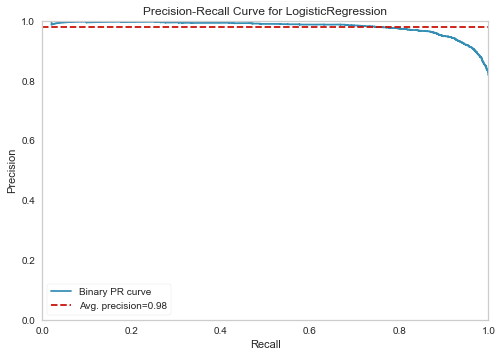

In [61]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = .1, max_iter=1000, penalty = "l2", class_weight= "balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [62]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_AP_neg = viz.score_

### TF-IDF

In [63]:
log = LogisticRegression(C = 1, max_iter=1000, penalty = "l2", class_weight= "balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       820
           1       0.97      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.87      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      3281
           1       0.98      0.88      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



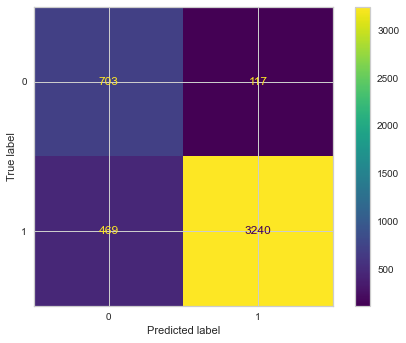

In [64]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

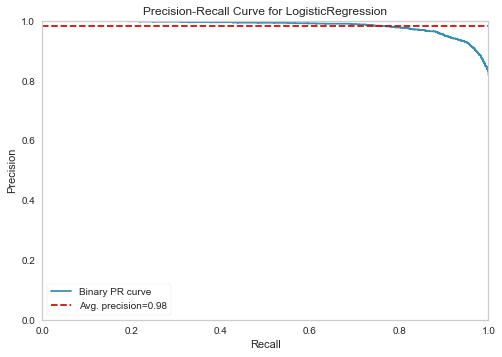

In [65]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter=1000, penalty = "l2", class_weight= "balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [66]:
y_pred = log.predict(X_test_tf_idf)
log_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_tf_idf_AP_neg = viz.score_

## Naive Bayes 

### Countvectorizer

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
nb_multi_count = MultinomialNB()
nb_multi_count.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.83      0.82      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



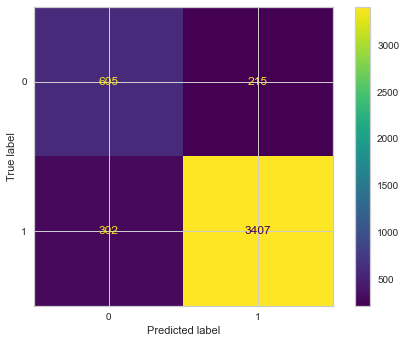

In [69]:
print("NB MODEL")
eval(nb_multi_count, X_train_count, X_test_count)

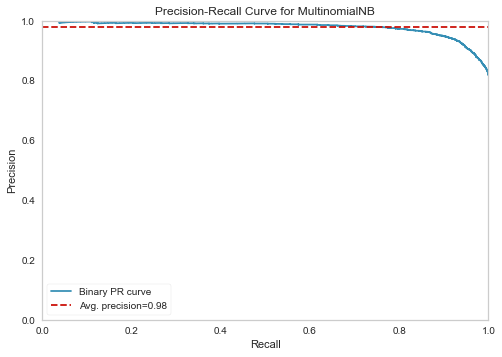

In [70]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb_multi_count.classes_,    
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [71]:
y_pred = nb_multi_count.predict(X_test_count)
nb_multi_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_multi_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_multi_count_AP_neg = viz.score_

### TF-IDF

In [72]:
nb_multi_tf_idf = MultinomialNB(alpha=0.01)
nb_multi_tf_idf.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=0.01)

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.80      0.29      0.43       820
           1       0.86      0.98      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.83      0.64      0.67      4529
weighted avg       0.85      0.86      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.49      0.64      3281
           1       0.90      0.99      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.91      0.74      0.79     18112
weighted avg       0.90      0.90      0.89     18112



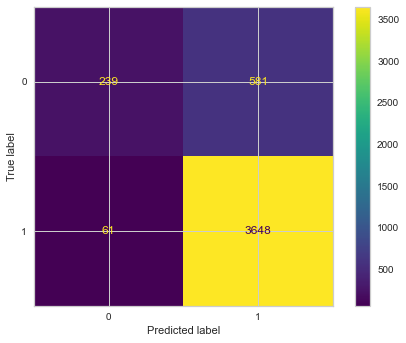

In [73]:
print("NB MODEL")
eval(nb_multi_tf_idf, X_train_tf_idf, X_test_tf_idf) 

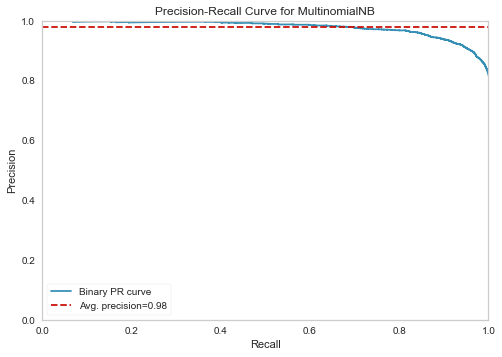

In [74]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb_multi_tf_idf.classes_,   
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [75]:
y_pred = nb_multi_tf_idf.predict(X_test_tf_idf)
nb_multi_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_multi_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_multi_tf_idf_AP_neg = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [76]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = .01)  
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       820
           1       0.91      0.96      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.84      0.76      0.79      4529
weighted avg       0.89      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.85      0.63      0.72      3281
           1       0.92      0.97      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.88      0.80      0.84     18112
weighted avg       0.91      0.91      0.91     18112



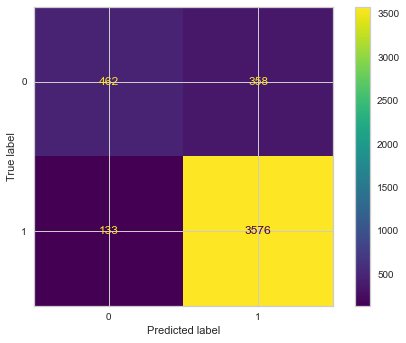

In [77]:
print("SVC MODEL")
eval(svc_count, X_train_count, X_test_count)

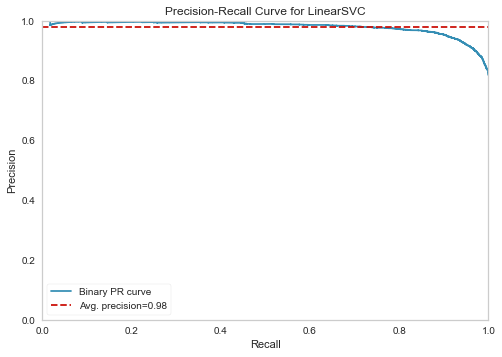

In [78]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [79]:
y_pred = svc_count.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
svc_count_AP_neg = viz.score_

### TD-IDF

In [80]:
svc_tf_idf = LinearSVC(C = 1)  
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=1)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       820
           1       0.92      0.95      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.83      0.79      0.80      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      3281
           1       0.95      0.98      0.97     14831

    accuracy                           0.94     18112
   macro avg       0.92      0.88      0.90     18112
weighted avg       0.94      0.94      0.94     18112



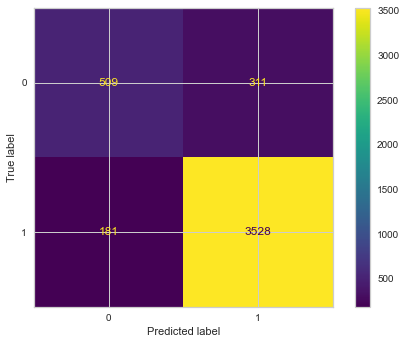

In [81]:
print("SVC MODEL")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

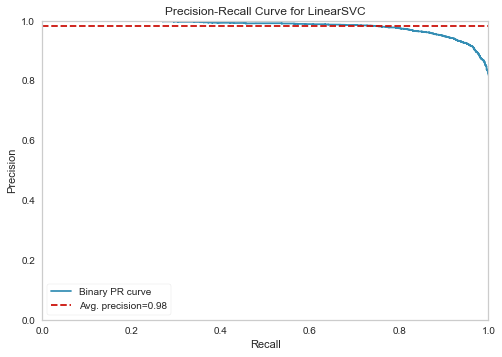

In [82]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [83]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
svc_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
svc_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
svc_tf_idf_AP_neg = viz.score_

## Random Forest

### Countvectorizer

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf_count = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced") 
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.78      0.65       820
           1       0.95      0.86      0.90      3709

    accuracy                           0.84      4529
   macro avg       0.75      0.82      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.86      0.71      3281
           1       0.97      0.88      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.87      0.82     18112
weighted avg       0.90      0.87      0.88     18112



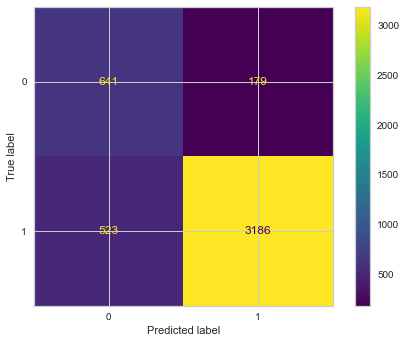

In [85]:
print("RF MODEL")
eval(rf_count, X_train_count, X_test_count)

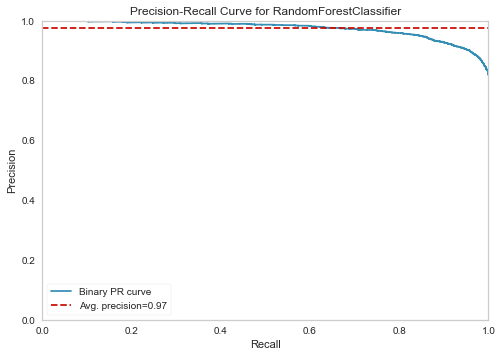

In [86]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced"),
    classes=rf_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [87]:
y_pred = rf_count.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_count_AP_neg = viz.score_

### TF-IDF

In [88]:
rf_tf_idf = RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.76      0.62       820
           1       0.94      0.85      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.80      0.76      4529
weighted avg       0.86      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.87      0.72      3281
           1       0.97      0.88      0.92     14831

    accuracy                           0.88     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.88      0.89     18112



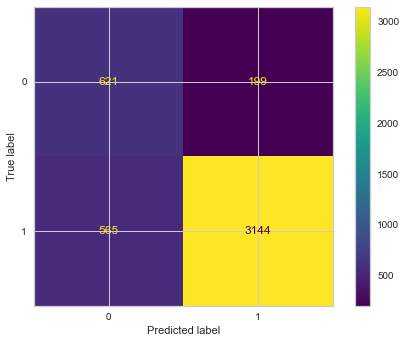

In [89]:
print("RF MODEL")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

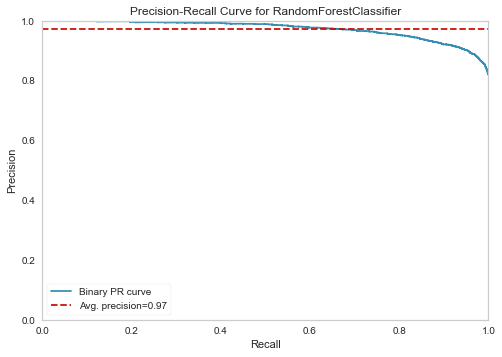

In [90]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 10, random_state = 101, n_jobs = -1, class_weight="balanced"),
    classes=rf_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [91]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_tf_idf_AP_neg = viz.score_

## Ada Boosting

### Countvectorizer

In [92]:
from sklearn.ensemble import AdaBoostClassifier
ada_count = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.73      0.58      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.76      0.79      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.66      0.72      3281
           1       0.93      0.96      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



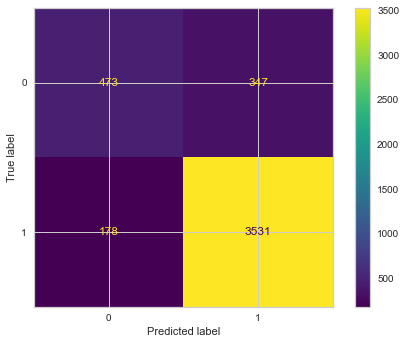

In [93]:
print("Ada MODEL")
eval(ada_count, X_train_count, X_test_count)

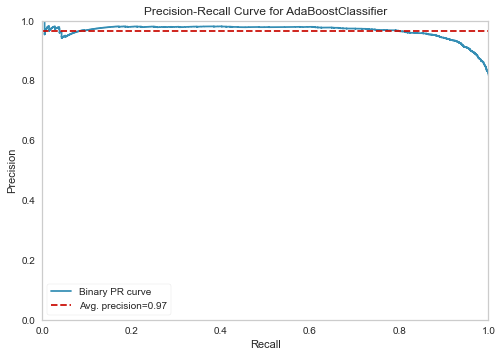

In [94]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada_count.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [95]:
y_pred = ada_count.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_count_AP_neg = viz.score_

### TF-IDF

In [96]:
ada_tf_idf = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.77      0.79      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



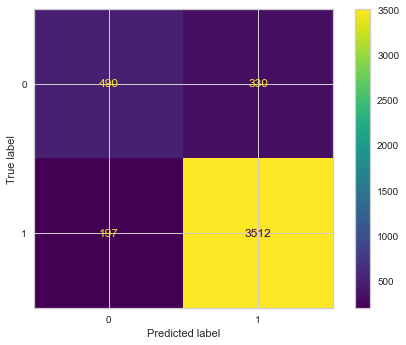

In [97]:
print("Ada MODEL")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

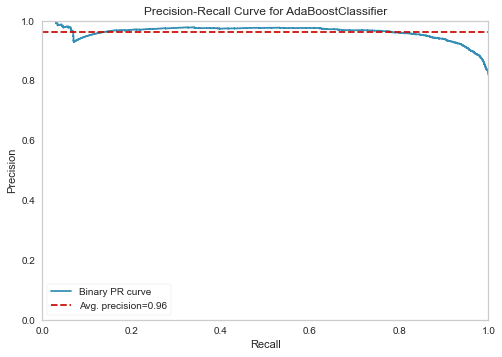

In [98]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada_tf_idf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [99]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tf_idf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_tf_idf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_tf_idf_AP_neg = viz.score_

## DL modeling

In [100]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [101]:
df2 = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df2.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [102]:
df2 = df2[["Review Text","Recommended IND"]]
df2.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [103]:
df2.dropna(inplace = True)

### Tokenization

In [104]:
X = df2['Review Text'].values
y = df2['Recommended IND'].values

In [106]:
num_words = 10000 
tokenizer = Tokenizer(num_words=num_words)

In [107]:
tokenizer.fit_on_texts(X)

### Creating word index

In [108]:
tokenizer.word_index 

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [109]:
len(tokenizer.word_index) 

14847

### Converting tokens to numeric

In [110]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [111]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [112]:
X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


### Maximum number of tokens for all documents¶

In [113]:
num_tokens.max()

116

In [114]:
num_tokens.mean() 

60.39287133960514

In [115]:
num_tokens.argmax()

16263

In [116]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [117]:
num_tokens.argmin()

820

In [118]:
X[820]

'Great style!'

### Fixing token counts of all documents (pad_sequences)

In [119]:
max_tokens = 103

In [120]:
sum(num_tokens < max_tokens) / len(num_tokens) 

0.9604699439070712

In [121]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [122]:
X_pad.shape

(22641, 103)

### Train Set Split

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101) 

### Modeling

In [128]:
model = Sequential()

In [129]:
embedding_size = 100 

In [130]:
model.add(Embedding(input_dim=num_words,        
                    output_dim=embedding_size,                                       
                    input_length=max_tokens,    
                    name='embedding_layer')) 

In [131]:
model.add(GRU(units=48, return_sequences=True))  
model.add(GRU(units=24, return_sequences=True))  
model.add(GRU(units=12))  
model.add(Dense(1, activation='sigmoid')) 

In [132]:
optimizer = Adam(lr=0.004)

In [133]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [134]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 103, 100)         1000000   
                                                                 
 gru (GRU)                   (None, 103, 48)           21600     
                                                                 
 gru_1 (GRU)                 (None, 103, 24)           5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1,028,309
Trainable params: 1,028,309
Non-trainable params: 0
_________________________________________________________________


In [135]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 5, restore_best_weights=True)

In [136]:
pd.Series(y_train).value_counts(normalize=True) 

1    0.818849
0    0.181151
dtype: float64

In [137]:
weights = {0:818, 1:181}

In [138]:
model.fit(X_train, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
71/71 [==============================] - 24s 263ms/step - loss: 135.0094 - recall: 0.7585 - val_loss: 0.4978 - val_recall: 0.7784
Epoch 2/25
71/71 [==============================] - 17s 238ms/step - loss: 85.2909 - recall: 0.8678 - val_loss: 0.3029 - val_recall: 0.8808
Epoch 3/25
71/71 [==============================] - 17s 236ms/step - loss: 62.1438 - recall: 0.9057 - val_loss: 0.3996 - val_recall: 0.8148
Epoch 4/25
71/71 [==============================] - 18s 254ms/step - loss: 50.5721 - recall: 0.9233 - val_loss: 0.3370 - val_recall: 0.8819
Epoch 5/25
71/71 [==============================] - 18s 247ms/step - loss: 39.1387 - recall: 0.9415 - val_loss: 0.3579 - val_recall: 0.8870
Epoch 6/25
71/71 [==============================] - 18s 249ms/step - loss: 31.2438 - recall: 0.9569 - val_loss: 0.3891 - val_recall: 0.9037
Epoch 7/25
71/71 [==============================] - 18s 249ms/step - loss: 26.0328 - recall: 0.9643 - val_loss: 0.4006 - val_recall: 0.9083
Epoch 7: early stop

In [140]:
model.save('NLP_Sentiment_Analysis_Project')

INFO:tensorflow:Assets written to: NLP_Sentiment_Analysis_Project\assets


INFO:tensorflow:Assets written to: NLP_Sentiment_Analysis_Project\assets


In [141]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,135.009445,0.758479,0.497791,0.778377
1,85.290878,0.867777,0.302927,0.880830
2,62.143753,0.905671,0.399567,0.814775
3,50.572094,0.923269,0.336991,0.881909
4,39.138668,0.941474,0.357884,0.887032


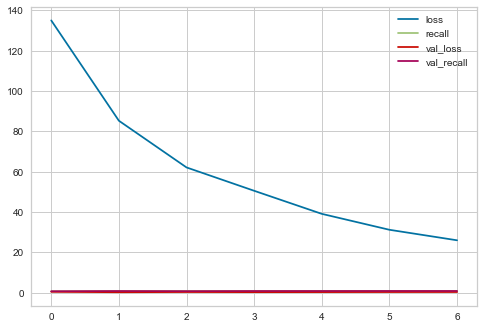

In [142]:
model_loss.plot();

In [143]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 11s 20ms/step - loss: 0.2186 - recall: 0.9060


[0.2185516059398651, 0.906007707118988]

In [144]:
model.evaluate(X_test, y_test) 

142/142 [==============================] - 3s 23ms/step - loss: 0.3029 - recall: 0.8808


[0.3029271364212036, 0.8808304071426392]

In [145]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 14s 23ms/step
[[ 3164   117]
 [ 1394 13437]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.96      0.81      3281
           1       0.99      0.91      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.84      0.94      0.88     18112
weighted avg       0.94      0.92      0.92     18112



In [146]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 4s 23ms/step
[[ 686  134]
 [ 442 3267]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.84      0.70       820
           1       0.96      0.88      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529



## BERT Modeling

### Tokenization

### Transformation text to tensor

### Train test split

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___